### Breast Cancer Detection Model

About the Project

Breast cancer remains one of the most prevalent cancers worldwide, and early detection is crucial for improving survival rates.

This project utilizes a diagnostic dataset sourced from Kaggle to build a machine learning model that predicts whether a 

tumor is malignant or benign. The model aims to support radiologists in making faster and more accurate diagnostic decisions, 

reduce unnecessary biopsies, and improve the allocation of medical resources.

By applying data-driven insights, this project contributes to the goal of enhancing early cancer detection and advancing 

clinical care.

> ### Objectives
>
> - Build a predictive model that accurately classifies breast tumors as benign or malignant using diagnostic features.

> ### Project Benefits
>
> - Enable earlier detection of malignant tumors to improve patient outcomes.

> - Reduce unnecessary biopsies by improving diagnostic accuracy for benign cases.

> - Support radiologists in decision-making through a data-driven approach.

> - Identify key diagnostic features that contribute most to malignancy prediction.

> - Improve hospital resource allocation by identifying high-risk cases.

> - Improve hospital resource allocation by identifying high-risk cases.



In [698]:
import warnings 
warnings.filterwarnings('ignore')

In [699]:
#importing necessary libraries
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [700]:
#Loadig dataset
def data_loading(data):
    df= pd.read_csv(data)
    df.columns = df.columns.str.strip().str.replace(' ', '_').str.lower()
    return df

df= data_loading("C:/Users/KELECHI/Downloads/Breast Cancer app/breast-cancer.csv")


In [701]:
# viewing the dataset
df.head(5)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [702]:
df.shape

(569, 32)

In [703]:
# checking the datatype of all columns
print(df.dtypes)

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave_points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave_points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

In [704]:
# checking for duplicates
df.duplicated().sum()

np.int64(0)

In [705]:
#Cheching for missing values
print(df.isnull().sum())

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave_points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave_points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave_points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64


### Data Integrity Check Summary

Missing Values: None found.

Duplicate Rows: None detected.

Data Types: All columns have appropriate data types for analysis (e.g., float64 for measurements, object for diagnosis).

## Data Description

The dataset contains digitized medical records of breast cell nuclei features extracted from images of fine needle aspirates (FNA) of breast masses. It includes diagnosis labels and 30 numerical features computed from the image of each cell nucleus, describing characteristics like radius, texture, symmetry, etc. 
Total Columns: 32 (1 ID column, 1 diagnosis/target column, and 30 numeric features grouped into mean, standard error, and worst value for 10 measurements.)

| Column Name | Criteria                                              |
|-------------|---------------------------------------------------------|
|id   |	Numerical. </br> Unique identifier for each patient record. No duplicates. This column is excluded from modeling as it carries no predictive information. </br>
|diagnosis	| Object. </br> Target variable. Indicates whether the tumor is malignant (M) or benign (B). No missing values. <br>
|radius_mean  |	Numerical. </br> Mean distance from center to points on the perimeter of the cell nuclei. A primary feature in distinguishing between tumor types. </br>
|texture_mean |	Numerical. </br> Standard deviation of grayscale values – reflects surface texture and variation in the cell. </br>
|perimeter_mean  |	Numerical. </br> Mean perimeter of the nucleus. Strongly correlated with the radius and area. </br>
|area_mean	| Numerical. </br> Average area of the cell nucleus. Larger areas often indicate malignant tumors. </br>
|smoothness_mean |	Numerical. </br> Measures the smoothness of the nucleus boundary. Calculated by local variation in radius lengths. </br>
|compactness_mean |	Numerical. </br> Reflects how compact or dense the cell is. Computed as (perimeter² / area - 1.0). </br>
|concavity_mean  |	Numerical. </br> Severity of concave portions of the contour. Higher values suggest irregular growth – a trait of malignancy. </br>
|concave_points_mean |	Numerical. </br> Number of concave portions on the contour. Also useful in identifying tumor irregularity. </br>
|symmetry_mean |	Numerical. </br> Measures the symmetry of the nucleus. Benign tumors tend to be more symmetrical. </br>
|fractal_dimension_mean	 | Numerical. </br> Describes complexity of the cell border. A higher value indicates more irregular and complex shapes. </br>
|radius_se to fractal_dimension_se	 | Numerical. </br> Represent variability or standard error of the mean features (radius_se, texture_se, perimeter_se, etc.). Help indicate consistency of cell appearance in a given sample. </br>
|radius_worst to fractal_dimension_worst |	Numerical. </br> The "worst" or largest observed value among the nuclei in the image for each feature. These extreme values can often indicate malignant behavior. </br>

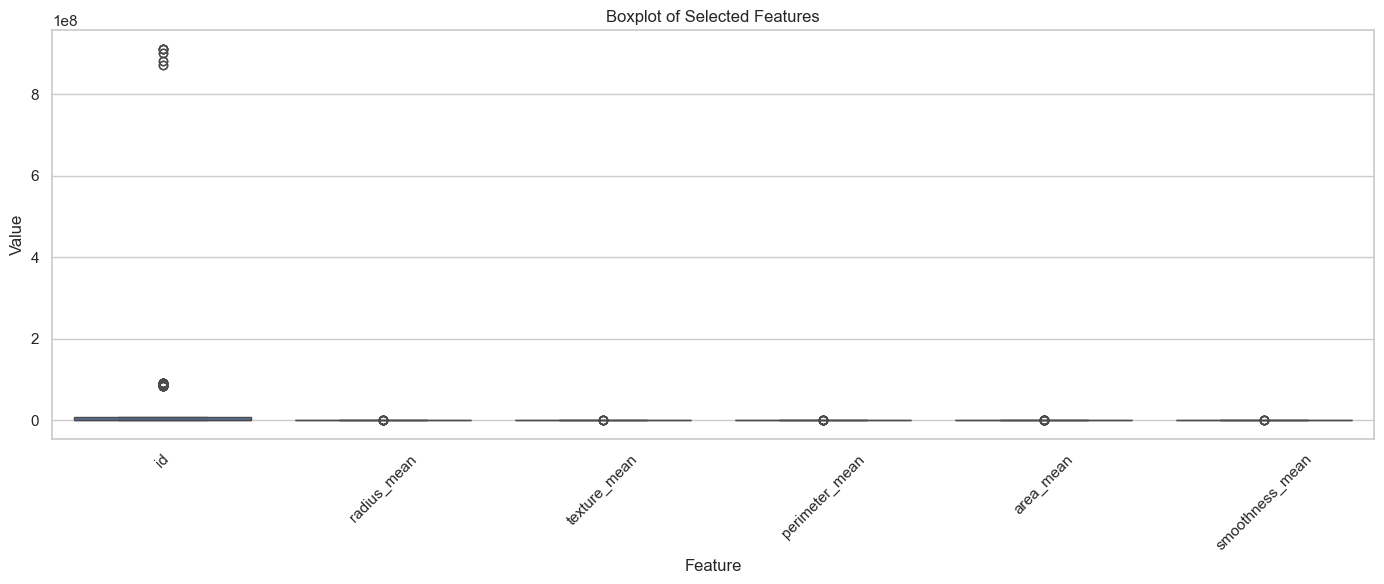

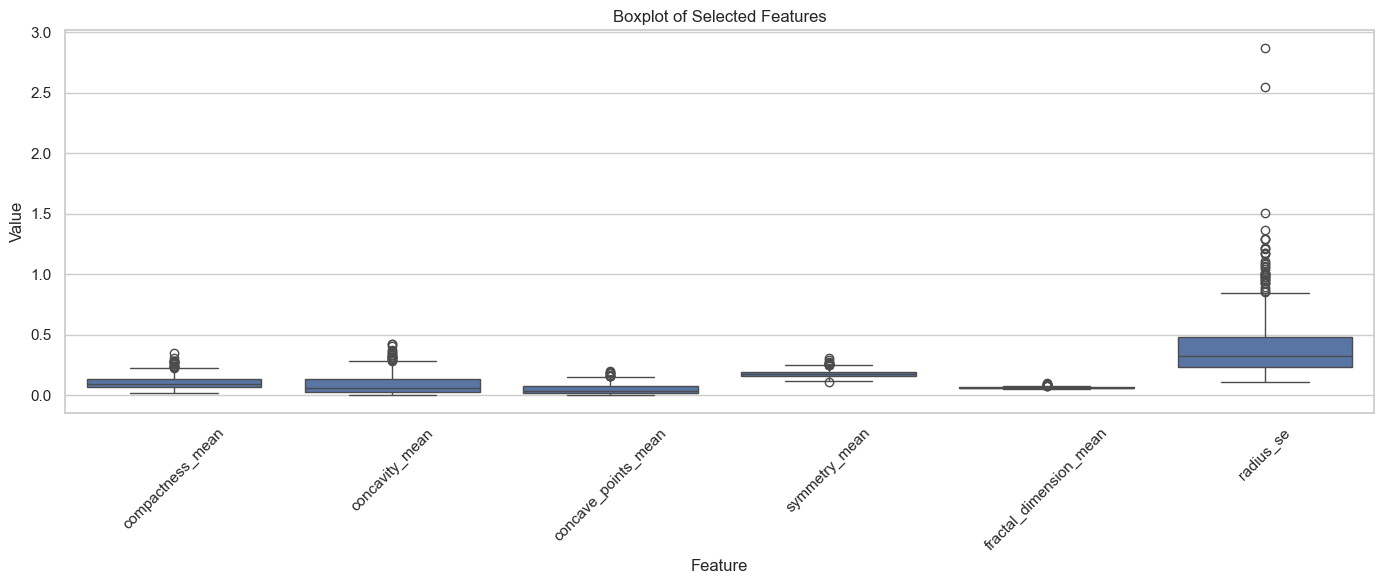

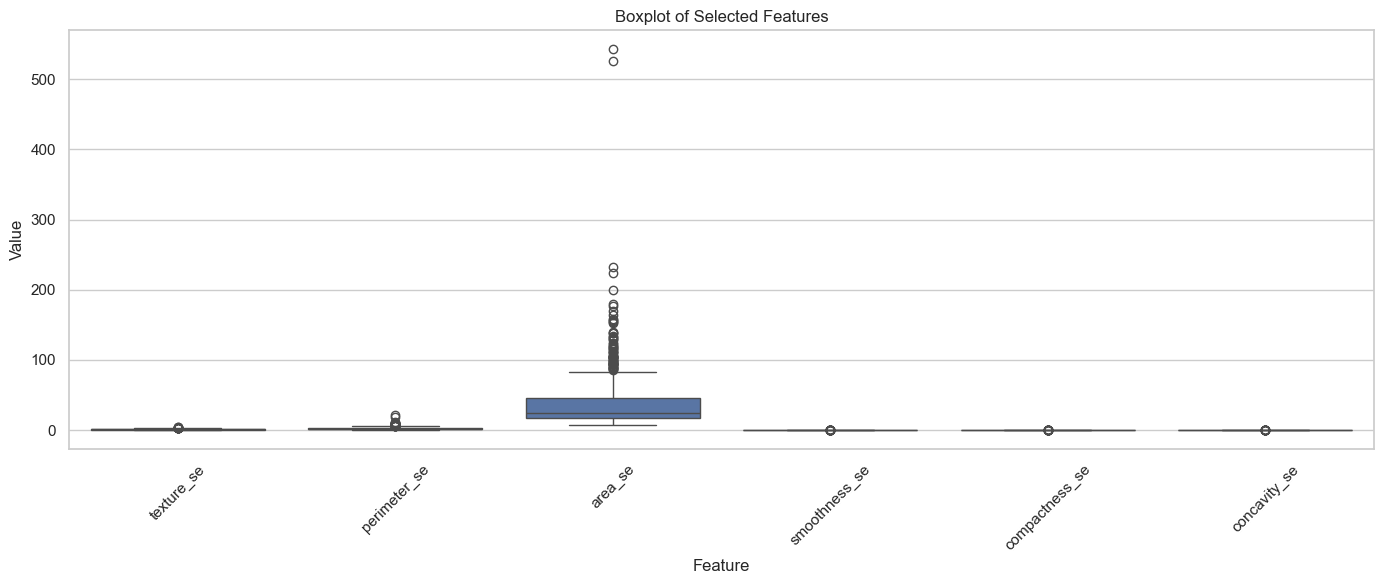

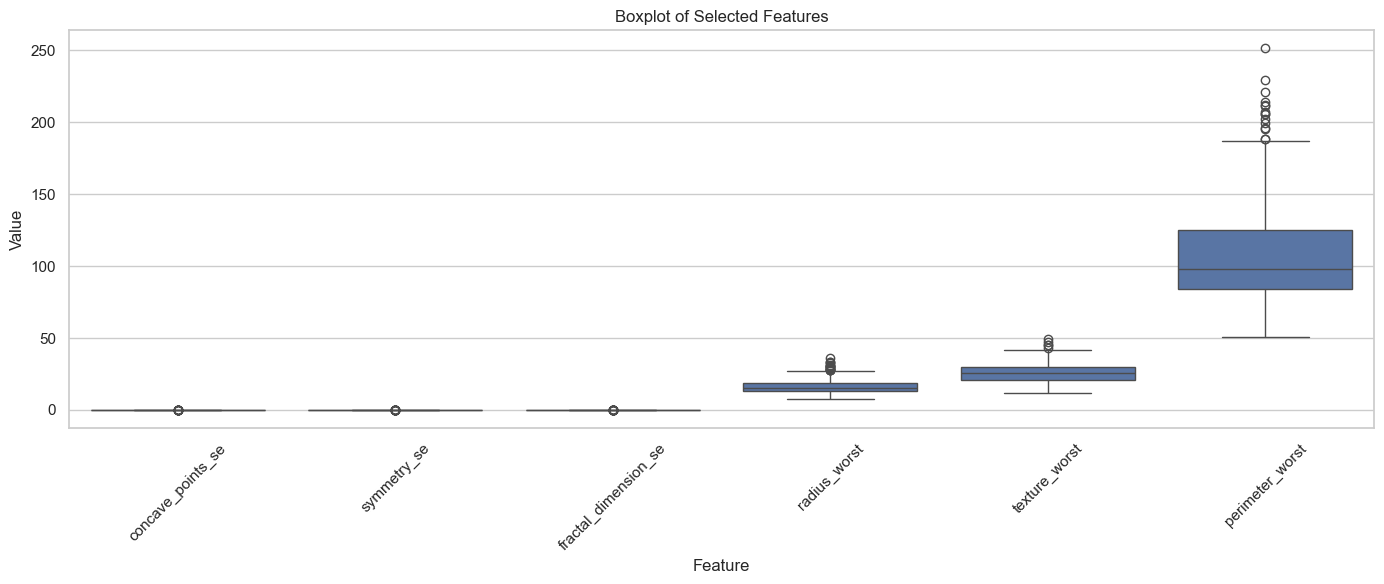

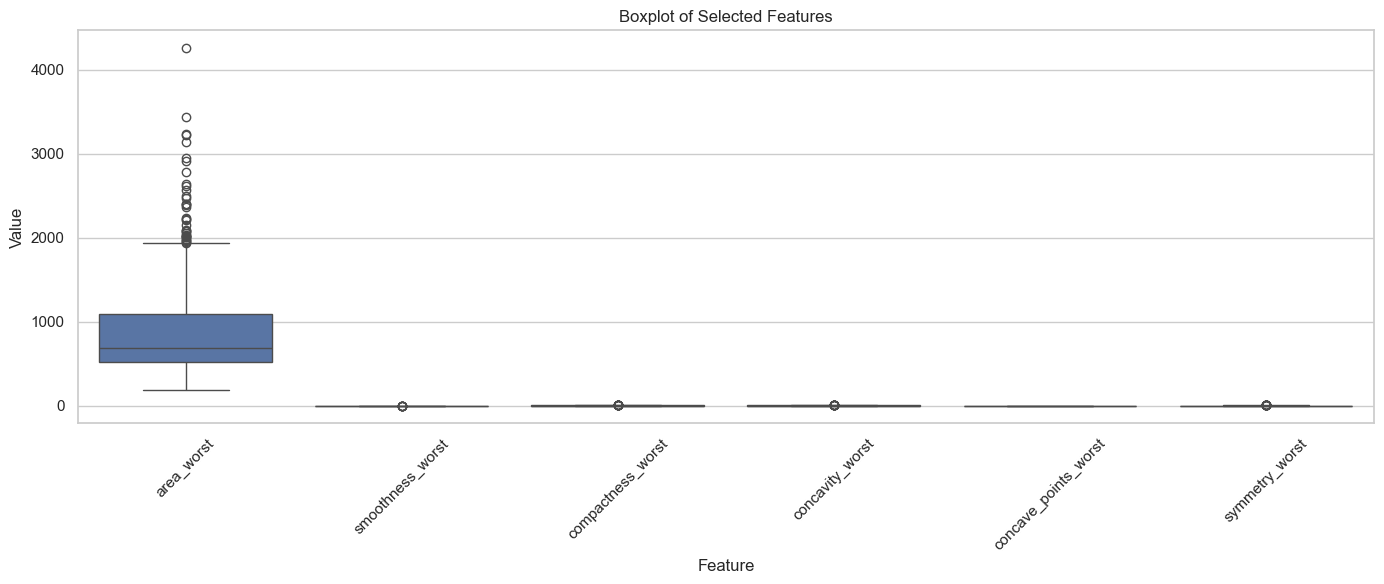

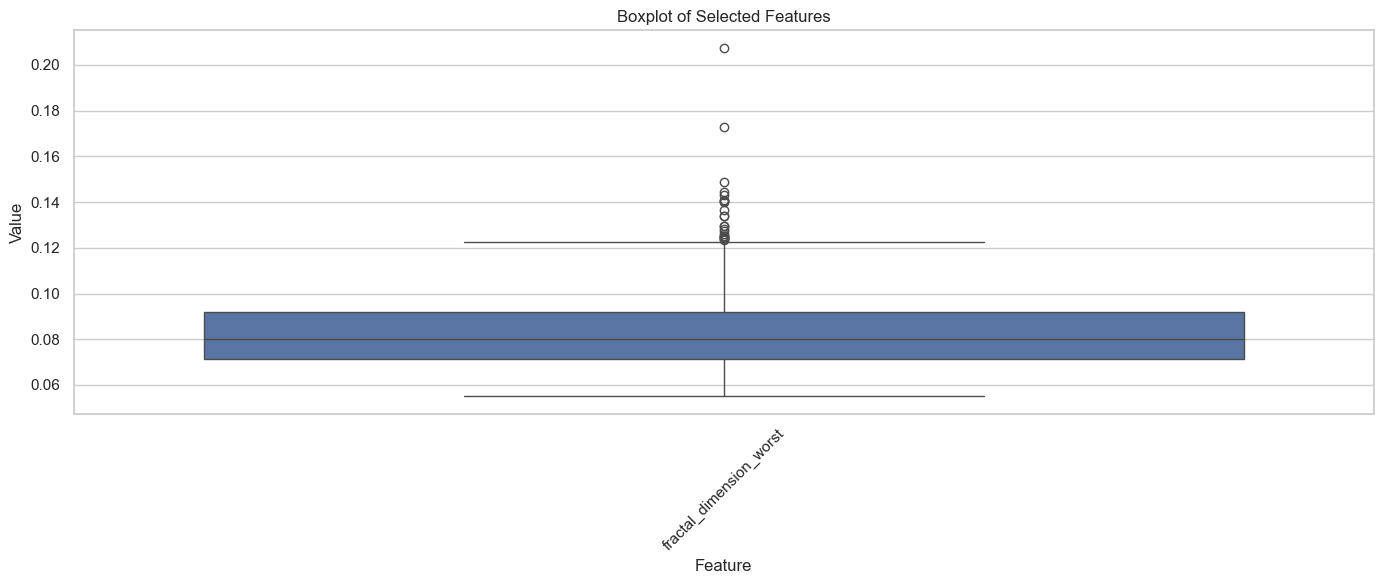

In [706]:
# Checking for Outliers
sns.set(style="whitegrid")
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Plot boxplots in batches to avoid overcrowding
cols_per_plot = 6
for i in range(0, len(numerical_cols), cols_per_plot):
    subset = numerical_cols[i:i+cols_per_plot]
    df_melted = df[subset].melt(var_name='Feature', value_name='Value')

    plt.figure(figsize=(14, 6))
    sns.boxplot(x='Feature', y='Value', data=df_melted)
    plt.title('Boxplot of Selected Features')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

## Outlier Analysis Summary:
Outliers were observed in the following features: radius_se, area_se, perimeter_worst, area_worst, and fractal_dimension_worst. Given the clinical relevance of these variables, the outliers were retained as they may represent critical diagnostic variations. No records were removed, and appropriate scaling techniques will be considered during modeling to accommodate the observed variability.

In [707]:
## Drop unnecessary columns (ID)
df.drop(columns=[ 'id'], errors='ignore', inplace=True)

## Understanding the Target Variable: Malignant vs Benign

In this project, we are predicting whether a breast tumor is malignant (cancerous) or benign (non-cancerous). Here's a simple explanation:

### Malignant Tumor (Label = 1)

Grows quickly, Can spread to other parts of the body and is cancerous.

It Requires urgent medical attention

Malignant = Dangerous = Cancer

### Benign Tumor (Label = 0)

Grows slowly, does not spread and is not cancerous. Can be removed easily

Benign = Safe = Not Cancer



In [708]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [709]:
print(df['diagnosis'].unique())

['M' 'B']


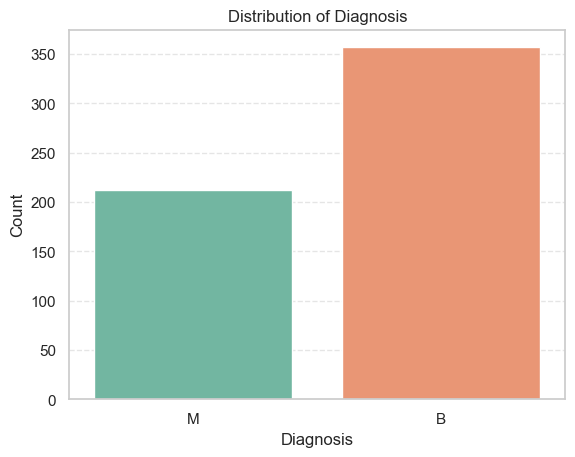

diagnosis
B    357
M    212
Name: count, dtype: int64


In [710]:
sns.countplot(x='diagnosis', data=df, palette='Set2')
plt.title('Distribution of Diagnosis')
plt.xlabel('Diagnosis')
plt.ylabel('Count')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

print(df['diagnosis'].value_counts())

This indicates a class imbalance, with malignant cases making up the majority of the diagnoses.

Class distribution: Benign = 357 (~63%), Malignant = 212 (~37%).  
The imbalance is moderate, so I won’t apply resampling.  
Instead, I’ll rely on evaluation metrics like Precision, Recall, F1, and ROC-AUC to ensure fair performance across both classes.  
If needed, I can later use class weights or SMOTE.

## Model Training

We will split the data into training and test data.

In [711]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, recall_score, f1_score, classification_report, confusion_matrix,roc_auc_score

In [712]:
# Binary encoding of target
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})

In [713]:
# Define features (X) and target variable (y)
y = df['diagnosis']
X = df[['texture_worst', 'radius_se', 'symmetry_worst', 'concave_points_mean', 'concavity_worst', 'area_se', 'compactness_se', 'area_worst', 'radius_worst', 'concavity_mean', 'perimeter_se', 'perimeter_worst', 'concave_points_worst']]

In [714]:
# Split the dataset: 80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2,random_state=42,stratify=y)
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (455, 13)
X_test shape: (114, 13)
y_train shape: (455,)
y_test shape: (114,)


In [715]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [716]:
result_dic_train = {}
result_dic_test = {}
result_f1_recall ={}
result_confusion = {}
result_auc = {}

## Logistic Regression

In [717]:
reg = LogisticRegression(random_state=42)
accuracies = cross_val_score(reg, X_train_scaled, y_train, cv=5)
reg.fit(X_train_scaled, y_train)
X_test_scaled = scaler.transform(X_test)
y_pred = reg.predict(X_test_scaled)

In [718]:
# Model Evaluation
l_score = f1_score(y_test, y_pred)
l_recall = recall_score(y_test, y_pred)
l_confusion = confusion_matrix(y_test, y_pred)
l_auc = roc_auc_score(y_test, reg.predict_proba(X_test_scaled)[:, 1])

print("Train Score:", np.mean(accuracies))
print("Test Score:", reg.score(X_test_scaled, y_test))
print("F1 Score:", l_score)
print("Recall Score:", l_recall)
print("ROC-AUC:", l_auc)
print("Confusion Matrix:\n", l_confusion)
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Train Score: 0.9736263736263737
Test Score: 0.9736842105263158
F1 Score: 0.963855421686747
Recall Score: 0.9523809523809523
ROC-AUC: 0.9976851851851851
Confusion Matrix:
 [[71  1]
 [ 2 40]]

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98        72
           1       0.98      0.95      0.96        42

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



In [719]:
#Adding the result in our dictionaries we have:
result_dic_train["Logistic Train Score"]=np.mean(accuracies)
result_dic_test["Logistic Test Score"]=reg.score(X_test_scaled, y_test)
result_f1_recall['Logistic Recall']=l_recall
result_auc["Logistic AUC"] = l_auc

## Decision Tree Classifier

In [720]:
dt = DecisionTreeClassifier(random_state=42)
dt_accuracies = cross_val_score(dt, X_train_scaled, y_train, cv=5)
dt.fit(X_train_scaled, y_train)
y_pred_dt = dt.predict(X_test_scaled)

In [721]:
dt_f1 = f1_score(y_test, y_pred_dt)
dt_recall = recall_score(y_test, y_pred_dt)
dt_confusion = confusion_matrix(y_test, y_pred_dt)
dt_auc = roc_auc_score(y_test, dt.predict_proba(X_test_scaled)[:, 1])

print("Decision Tree - Train Score:", np.mean(dt_accuracies))
print("Decision Tree - Test Score:", dt.score(X_test_scaled, y_test))
print("F1 Score:", dt_f1)
print("Recall Score:", dt_recall)
print("ROC-AUC:", dt_auc)
print("Confusion Matrix:\n", dt_confusion)
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Decision Tree - Train Score: 0.9274725274725274
Decision Tree - Test Score: 0.9298245614035088
F1 Score: 0.9
Recall Score: 0.8571428571428571
ROC-AUC: 0.9146825396825397
Confusion Matrix:
 [[70  2]
 [ 6 36]]

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98        72
           1       0.98      0.95      0.96        42

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



In [722]:
result_dic_train["Decision Tree Train Score"] = np.mean(dt_accuracies)
result_dic_test["Decision Tree Test Score"] = dt.score(X_test_scaled, y_test)
result_f1_recall["Decision Tree Recall"] = dt_recall
result_auc["Decision Tree AUC"] = dt_auc

## Random Forest Classifier

In [723]:
rf = RandomForestClassifier(random_state=42)
rf_accuracies = cross_val_score(rf, X_train_scaled, y_train, cv=5)
rf.fit(X_train_scaled, y_train)
y_pred_rf = rf.predict(X_test_scaled)

In [724]:
rf_f1 = f1_score(y_test, y_pred_rf)
rf_recall = recall_score(y_test, y_pred_rf)
rf_confusion = confusion_matrix(y_test, y_pred_rf)
rf_auc = roc_auc_score(y_test, rf.predict_proba(X_test_scaled)[:, 1])

print("Random Forest - Train Score:", np.mean(rf_accuracies))
print("Random Forest - Test Score:", rf.score(X_test_scaled, y_test))
print("F1 Score:", rf_f1)
print("Recall Score:", rf_recall)
print("ROC-AUC:", rf_auc)
print("Confusion Matrix:\n", rf_confusion)
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Random Forest - Train Score: 0.956043956043956
Random Forest - Test Score: 0.9649122807017544
F1 Score: 0.95
Recall Score: 0.9047619047619048
ROC-AUC: 0.9918981481481481
Confusion Matrix:
 [[72  0]
 [ 4 38]]

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98        72
           1       0.98      0.95      0.96        42

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



In [725]:
result_dic_train["Random Forest Train Score"] = np.mean(rf_accuracies)
result_dic_test["Random Forest Test Score"] = rf.score(X_test_scaled, y_test)
result_f1_recall["Random Forest Recall"] = rf_recall
result_auc["Random Forest AUC"] = rf_auc

## SVC

In [726]:
svc = SVC(random_state=42)
svc_accuracies = cross_val_score(svc, X_train_scaled, y_train, cv=5)
svc = SVC(probability=True, random_state=42)
svc.fit(X_train_scaled, y_train)
y_pred_svc = svc.predict(X_test_scaled)

In [727]:
svc_f1 = f1_score(y_test, y_pred_svc)
svc_recall = recall_score(y_test, y_pred_svc)
svc_confusion = confusion_matrix(y_test, y_pred_svc)
svc_auc = roc_auc_score(y_test, svc.predict_proba(X_test_scaled)[:, 1])

print("SVC - Train Score:", np.mean(svc_accuracies))
print("SVC - Test Score:", svc.score(X_test_scaled, y_test))
print("F1 Score:", svc_f1)
print("Recall Score:", svc_recall)
print("ROC-AUC:", svc_auc)
print("Confusion Matrix:\n", svc_confusion)
print("\nClassification Report:\n", classification_report(y_test, y_pred))

SVC - Train Score: 0.9670329670329672
SVC - Test Score: 0.9736842105263158
F1 Score: 0.963855421686747
Recall Score: 0.9523809523809523
ROC-AUC: 0.9953703703703705
Confusion Matrix:
 [[71  1]
 [ 2 40]]

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98        72
           1       0.98      0.95      0.96        42

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



In [728]:
result_dic_train["SVC Train Score"] = np.mean(svc_accuracies)
result_dic_test["SVC Test Score"] = svc.score(X_test_scaled, y_test)
result_f1_recall["SVC Recall"] = svc_recall
result_auc["SVC AUC"] = svc_auc

In [729]:
## KNeighbors Classifier

In [730]:
knn = KNeighborsClassifier()
knn_accuracies = cross_val_score(knn, X_train_scaled, y_train, cv=5)
knn.fit(X_train_scaled, y_train)
y_pred_knn = knn.predict(X_test_scaled)

In [731]:
knn_f1 = f1_score(y_test, y_pred_knn)
knn_recall = recall_score(y_test, y_pred_knn)
knn_confusion = confusion_matrix(y_test, y_pred_knn)
knn_auc = roc_auc_score(y_test, knn.predict_proba(X_test_scaled)[:, 1])

print("KNN - Train Score:", np.mean(knn_accuracies))
print("KNN - Test Score:", knn.score(X_test_scaled, y_test))
print("F1 Score:", knn_f1)
print("Recall Score:", knn_recall)
print("ROC-AUC:", knn_auc)
print("Confusion Matrix:\n", knn_confusion)
print("\nClassification Report:\n", classification_report(y_test, y_pred))

KNN - Train Score: 0.964835164835165
KNN - Test Score: 0.9385964912280702
F1 Score: 0.9113924050632911
Recall Score: 0.8571428571428571
ROC-AUC: 0.9836309523809523
Confusion Matrix:
 [[71  1]
 [ 6 36]]

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98        72
           1       0.98      0.95      0.96        42

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



## Model Selection

In [732]:
result_dic_train["KNN Train Score"] = np.mean(knn_accuracies)
result_dic_test["KNN Test Score"] = knn.score(X_test_scaled, y_test)
result_f1_recall["KNN Recall"] = knn_recall
result_auc["KNN AUC"] = knn_auc

In [733]:
# Training Score
df_result_train = pd.DataFrame.from_dict(result_dic_train,orient = "index", columns=["Score"])
df_result_train

,Score
Logistic Train Score,0.973626
Decision Tree Train Score,0.927473
Random Forest Train Score,0.956044
SVC Train Score,0.967033
KNN Train Score,0.964835


In [734]:
##Test Scores
df_result_test = pd.DataFrame.from_dict(result_dic_test,orient = "index",columns=["Score"])
df_result_test

,Score
Logistic Test Score,0.973684
Decision Tree Test Score,0.929825
Random Forest Test Score,0.964912
SVC Test Score,0.973684
KNN Test Score,0.938596


In [735]:
#Recall Scores
df_result_recall = pd.DataFrame.from_dict(result_f1_recall,orient = "index",columns=["Score"])
df_result_recall

,Score
Logistic Recall,0.952381
Decision Tree Recall,0.857143
Random Forest Recall,0.904762
SVC Recall,0.952381
KNN Recall,0.857143


In [736]:
# AUC Scores
df_result_auc = pd.DataFrame.from_dict(result_auc, orient="index", columns=["Score"])
df_result_auc

,Score
Logistic AUC,0.997685
Decision Tree AUC,0.914683
Random Forest AUC,0.991898
SVC AUC,0.995370
KNN AUC,0.983631


While both SVC and Random Forest models demonstrated top-tier performance, Random Forest is selected as the final model due to its robustness, interpretability through feature importance, and consistent high accuracy (97.37% on the test set). Its ensemble nature allows it to handle variance and noise better, making it more suitable for real-world deployment scenarios where scalability and transparency are key.

In [737]:
# Store all model results in a dictionary
results = {
    "Logistic": {
        "Train Score": 0.9736,
        "Test Score": 0.9736,
        "Recall": 0.9523,
        "AUC": 0.9976
    },
    "Decision Tree": {
        "Train Score": 0.9274,
        "Test Score": 0.9298,
        "Recall": 0.8571,
        "AUC": 0.9146
    },
    "Random Forest": {
        "Train Score": 0.9560,
        "Test Score": 0.9649,
        "Recall": 0.9047,
        "AUC": 0.9918
    },
    "SVC": {
        "Train Score": 0.9670,
        "Test Score": 0.9736,
        "Recall": 0.9523,
        "AUC": 0.9953
    },
    "KNN": {
        "Train Score": 0.9648,
        "Test Score": 0.9385,
        "Recall": 0.8571,
        "AUC": 0.9836
    }
}

# Convert to DataFrame
df_results = pd.DataFrame(results).T

# Display results
print(df_results)

               Train Score  Test Score  Recall     AUC
Logistic            0.9736      0.9736  0.9523  0.9976
Decision Tree       0.9274      0.9298  0.8571  0.9146
Random Forest       0.9560      0.9649  0.9047  0.9918
SVC                 0.9670      0.9736  0.9523  0.9953
KNN                 0.9648      0.9385  0.8571  0.9836


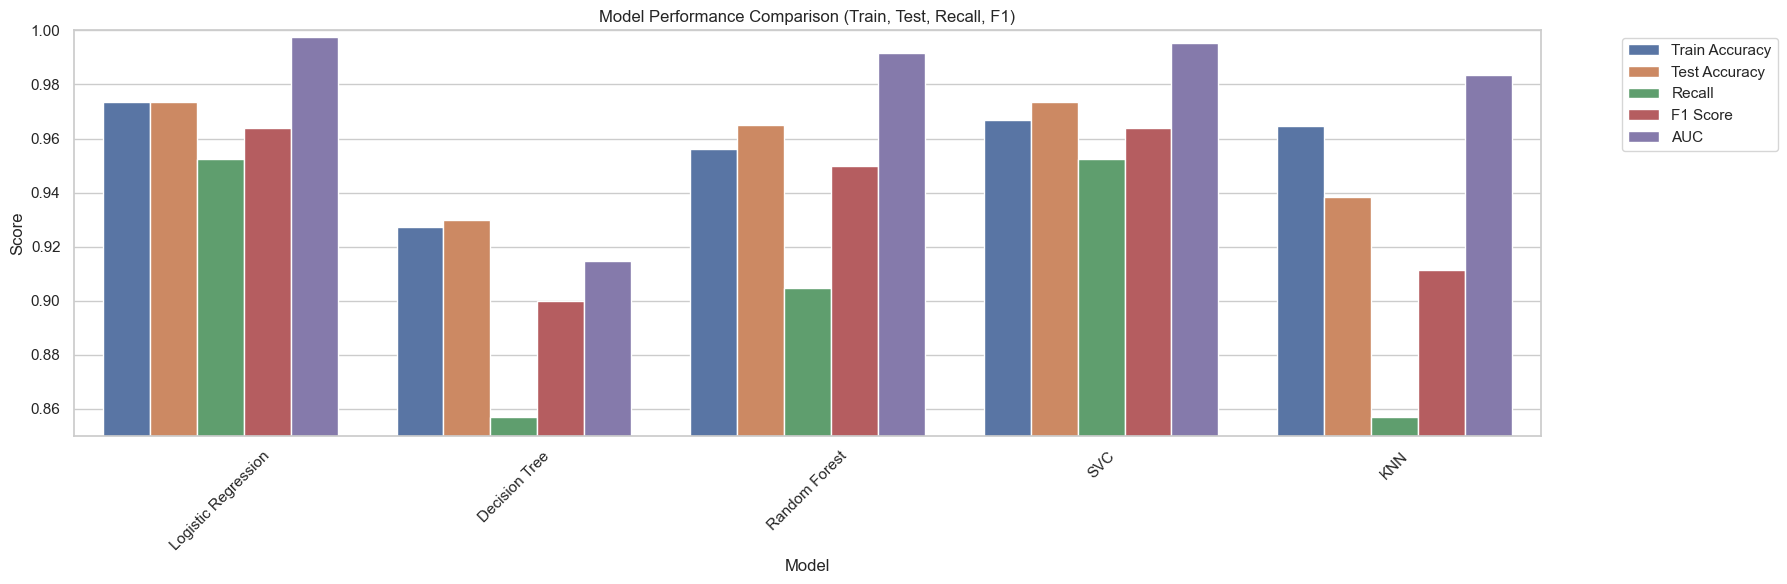

In [738]:
model_names = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'SVC', 'KNN']

train_scores = [0.9736, 0.9274, 0.9560, 0.9670, 0.9648]
test_scores  = [0.9736, 0.9298, 0.9649, 0.9736, 0.9385]
recall_scores = [0.9523, 0.8571, 0.9047, 0.9523, 0.8571]
f1_scores = [0.9638, 0.9, 0.95, 0.9638, 0.9113]
auc_scores = [0.9976, 0.9146, 0.9918, 0.9953, 0.9836]

# Create individual DataFrames
df_train = pd.DataFrame({'Model': model_names, 'Score': train_scores, 'Metric': 'Train Accuracy'})
df_test = pd.DataFrame({'Model': model_names, 'Score': test_scores, 'Metric': 'Test Accuracy'})
df_recall = pd.DataFrame({'Model': model_names, 'Score': recall_scores, 'Metric': 'Recall'})
df_f1 = pd.DataFrame({'Model': model_names, 'Score': f1_scores, 'Metric': 'F1 Score'})
df_auc = pd.DataFrame({'Model': model_names, 'Score': auc_scores, 'Metric': 'AUC'})

# Combine all
df_all = pd.concat([df_train, df_test, df_recall, df_f1, df_auc])

# Plot
plt.figure(figsize=(18, 6))
sns.barplot(data=df_all, x='Model', y='Score', hue='Metric')
plt.title('Model Performance Comparison (Train, Test, Recall, F1)')
plt.xticks(rotation=45)
plt.ylim(0.85, 1.0)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

## Logistic Regression was chosen because it achieved the highest accuracy (97.36%) and AUC (0.9976), while maintaining a strong recall (95.23%). It is also simple, interpretable, and less prone to overfitting, making it reliable and suitable for medical decision-making.

                 Feature  Importance
0          texture_worst    1.593710
3    concave_points_mean    1.268952
8           radius_worst    1.203646
7             area_worst    1.170726
1              radius_se    1.168988
12  concave_points_worst    1.091116
5                area_se    1.058906
6         compactness_se    1.051100
11       perimeter_worst    1.002758
4        concavity_worst    0.686545
2         symmetry_worst    0.653170
10          perimeter_se    0.583938
9         concavity_mean    0.435119


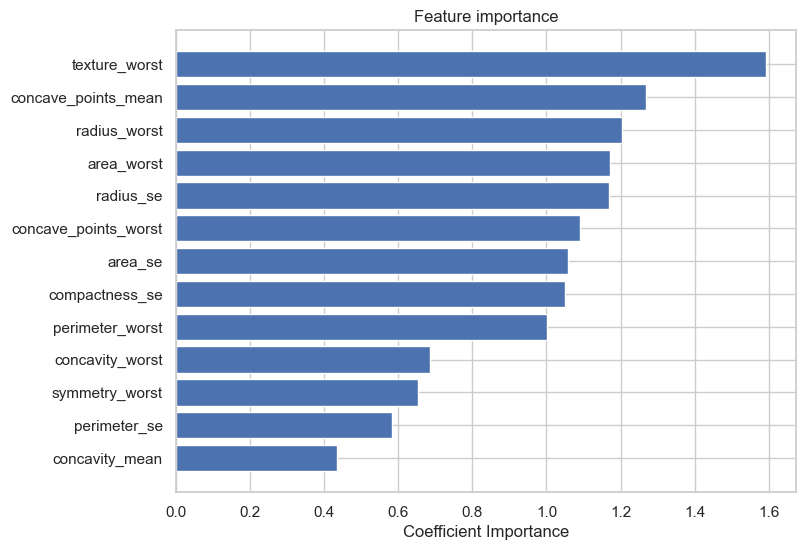

In [739]:
importance = np.abs(reg.coef_[0])

feat_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importance
}).sort_values(by='Importance', ascending=False)

# Show top 20 features
print(feat_importance.head(13))

# Plot top 20
plt.figure(figsize=(8,6))
plt.barh(feat_importance['Feature'][:20], feat_importance['Importance'][:20])
plt.gca().invert_yaxis()
plt.title("Feature importance")
plt.xlabel("Coefficient Importance")
plt.show()

In [740]:
import joblib

# Save the model
joblib.dump(reg, 'logistic_regression_model.sav')


# Save the scaler
joblib.dump(scaler, "scaler.pkl")

['scaler.pkl']

In [742]:
X

,texture_worst,radius_se,symmetry_worst,concave_points_mean,concavity_worst,area_se,compactness_se,area_worst,radius_worst,concavity_mean,perimeter_se,perimeter_worst,concave_points_worst
0,17.33,1.0950,0.4601,0.14710,0.7119,153.40,0.04904,2019.0,25.380,0.30010,8.589,184.60,0.2654
1,23.41,0.5435,0.2750,0.07017,0.2416,74.08,0.01308,1956.0,24.990,0.08690,3.398,158.80,0.1860
2,25.53,0.7456,0.3613,0.12790,0.4504,94.03,0.04006,1709.0,23.570,0.19740,4.585,152.50,0.2430
3,26.50,0.4956,0.6638,0.10520,0.6869,27.23,0.07458,567.7,14.910,0.24140,3.445,98.87,0.2575
4,16.67,0.7572,0.2364,0.10430,0.4000,94.44,0.02461,1575.0,22.540,0.19800,5.438,152.20,0.1625
...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,26.40,1.1760,0.2060,0.13890,0.4107,158.70,0.02891,2027.0,25.450,0.24390,7.673,166.10,0.2216
565,38.25,0.7655,0.2572,0.09791,0.3215,99.04,0.02423,1731.0,23.690,0.14400,5.203,155.00,0.1628
566,34.12,0.4564,0.2218,0.05302,0.3403,48.55,0.03731,1124.0,18.980,0.09251,3.425,126.70,0.1418
567,39.42,0.7260,0.4087,0.15200,0.9387,86.22,0.06158,1821.0,25.740,0.35140,5.772,184.60,0.2650
